# Read in user data from json files

Citation:

Max Aliapoulios, Emmi Bevensee, Jeremy Blackburn, Barry Bradlyn, Emiliano De Cristofaro, Gianluca Stringhini, & Savvas Zannettou. (2021). A Large Open Dataset from the Parler Social Network (Version 1) [Data set]. Zenodo. https://doi.org/10.5281/zenodo.4442460

## Read in dataset

Each json file is a post scraped from parler and compiled by Aliapoulios et al. 2021 

In [24]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [2]:
# solution for reading in ndjson from: https://stackoverflow.com/questions/63501251/how-to-open-ndjson-file-in-python 

In [3]:
# df = pd.read_json('data/parler_users/parler_user000000000000.ndjson', lines=True)

In [4]:
# with open('data/parler_users/parler_user000000000000.ndjson', 'r') as f:
#     data = json.load(f)

In [5]:
# df.shape

The first user file has 1472075 user IDs and 30 features 

In [6]:
# sample = df.sample(100_000, random_state=42)

In [7]:
# sample.to_csv('data/user_00_raw_sample.csv')

In [8]:
sample = pd.read_csv('data/user_00_raw_sample.csv')
sample.drop(columns='Unnamed: 0', inplace=True)

In [25]:
sample.head()

,id,key,banned,blocked,comments,datatype,followed,user_followers,user_following,following,human,integration,isFollowingYou,joined,lastseents,likes,media,muted,pendingFollow,posts,private,rss,userid,username,verified,verifiedComments
0,76ae04ba192f4f029b5fbb26e9915443,76ae04ba192f4f029b5fbb26e9915443,0.0,0.0,0.0,user_profile,0.0,0.0,8.0,8.0,0.0,0.0,0.0,2.021011e+13,2021-01-08 04:37:47.229435 UTC,0.0,0.0,0.0,0.0,1.0,0.0,0.0,76ae04ba192f4f029b5fbb26e9915443,halkiat,False,0.0
1,1034e4a078ef4be29b4e66301c6d44dc,1034e4a078ef4be29b4e66301c6d44dc,0.0,0.0,0.0,user_profile,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.019063e+13,2020-12-21 15:30:55.666202 UTC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1034e4a078ef4be29b4e66301c6d44dc,Parler+ztq7o,False,0.0
3,e84ef3c7e1e443f59c6fafd29c3eff0e,e84ef3c7e1e443f59c6fafd29c3eff0e,0.0,0.0,0.0,user_profile,0.0,2.0,18.0,18.0,0.0,0.0,0.0,2.020073e+13,2020-12-21 01:56:56.395851 UTC,0.0,0.0,0.0,0.0,1.0,0.0,0.0,e84ef3c7e1e443f59c6fafd29c3eff0e,Tommy9iron1,False,0.0
4,8813d6952a5449849cef748f4c7b3277,8813d6952a5449849cef748f4c7b3277,0.0,0.0,0.0,user_profile,0.0,1.0,3.0,3.0,0.0,0.0,0.0,2.020063e+13,2020-12-21 22:20:03.408452 UTC,0.0,0.0,0.0,0.0,6.0,0.0,0.0,8813d6952a5449849cef748f4c7b3277,Cha951390,False,0.0
5,5f88254dfbf64210900e421d455298f6,5f88254dfbf64210900e421d455298f6,0.0,0.0,0.0,user_profile,0.0,4.0,8.0,8.0,0.0,0.0,0.0,2.020111e+13,2020-12-21 23:37:34.877248 UTC,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5f88254dfbf64210900e421d455298f6,CoryCox77,False,0.0


In [10]:
sample.columns

Index(['id', 'key', 'badges', 'banned', 'bio', 'blocked', 'comments',
       'datatype', 'followed', 'user_followers', 'user_following', 'following',
       'human', 'integration', 'isFollowingYou', 'joined', 'lastseents',
       'likes', 'media', 'muted', 'pendingFollow', 'posts', 'private',
       'profilePhoto', 'rss', 'state', 'userid', 'username', 'verified',
       'verifiedComments'],
      dtype='object')

In [11]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                100000 non-null  object 
 1   key               100000 non-null  object 
 2   badges            100000 non-null  object 
 3   banned            99981 non-null   float64
 4   bio               12565 non-null   object 
 5   blocked           100000 non-null  float64
 6   comments          93013 non-null   float64
 7   datatype          100000 non-null  object 
 8   followed          100000 non-null  float64
 9   user_followers    93101 non-null   float64
 10  user_following    93101 non-null   float64
 11  following         93013 non-null   float64
 12  human             100000 non-null  float64
 13  integration       100000 non-null  float64
 14  isFollowingYou    99981 non-null   float64
 15  joined            100000 non-null  float64
 16  lastseents        999

In [12]:
sample.isna().sum()/len(sample)*100

id                   0.000
key                  0.000
badges               0.000
banned               0.019
bio                 87.435
blocked              0.000
comments             6.987
datatype             0.000
followed             0.000
user_followers       6.899
user_following       6.899
following            6.987
human                0.000
integration          0.000
isFollowingYou       0.019
joined               0.000
lastseents           0.015
likes                6.987
media                6.987
muted                0.000
pendingFollow        0.019
posts                6.987
private              0.024
profilePhoto        64.028
rss                  0.000
state               26.514
userid               0.000
username             0.001
verified             0.000
verifiedComments     0.000
dtype: float64

### Drop columns with over 10% null values 

In [13]:
sample['state'].value_counts()

1.0    70785
5.0     1997
2.0      591
3.0      113
Name: state, dtype: int64

In [14]:
sample['profilePhoto'].value_counts()

e373c936ec4e4793b68f3017b99b920d    1
0947a345af3d45ff8350c76636b198ec    1
07abab877a8d4e478f77a3e8c799f891    1
8e49d2c4dc0f492c9145acb1d34e3348    1
c481830bee8a44b48c8e57146921753d    1
                                   ..
36b6c606d45641f6a570137c504c3838    1
c63de6cfb5514dbe8fa583e97cd86349    1
bc7246779300489c97bf309e255698e0    1
5cdef8c4acb14cb685e74cfdb2e4013a    1
b272d5d33db44323b47b985b97e0c43e    1
Name: profilePhoto, Length: 35972, dtype: int64

In [15]:
bio_df = sample[['bio']].dropna().reset_index(drop=True)
bio_df = bio_df.loc[(bio_df['bio'] != '') & (bio_df['bio'] != ' ')]
bio_df.head(3)

,bio
0,"���� #USA, ����#TRUMP2020, ����#MAGA, ������#B..."
1,King Sky with a patch on my eye. Loving life a...
2,“A arquitetura da minha alma é barroca. Sou fr...


In [30]:
bio_df.to_csv('data/user_00_bio_sample.csv', index=False)

In [16]:
sample = sample.drop(columns=['bio', 'profilePhoto', 'state', 'badges'])

### Drop nulls for the rest of the dataframe

In [17]:
original_len = sample.shape[0]

In [18]:
sample.dropna(inplace=True)
new_len = sample.shape[0]
new_len/original_len*100

92.976

In [19]:
numeric_cols = list(sample.select_dtypes(include='number'))
print(numeric_cols)

['banned', 'blocked', 'comments', 'followed', 'user_followers', 'user_following', 'following', 'human', 'integration', 'isFollowingYou', 'joined', 'likes', 'media', 'muted', 'pendingFollow', 'posts', 'private', 'rss', 'verifiedComments']


In [20]:
object_cols = sample.drop(columns=numeric_cols).columns
object_cols

Index(['id', 'key', 'datatype', 'lastseents', 'userid', 'username',
       'verified'],
      dtype='object')

In [21]:
sample.head(3)

,id,key,banned,blocked,comments,datatype,followed,user_followers,user_following,following,...,media,muted,pendingFollow,posts,private,rss,userid,username,verified,verifiedComments
0,76ae04ba192f4f029b5fbb26e9915443,76ae04ba192f4f029b5fbb26e9915443,0.0,0.0,0.0,user_profile,0.0,0.0,8.0,8.0,...,0.0,0.0,0.0,1.0,0.0,0.0,76ae04ba192f4f029b5fbb26e9915443,halkiat,False,0.0
1,1034e4a078ef4be29b4e66301c6d44dc,1034e4a078ef4be29b4e66301c6d44dc,0.0,0.0,0.0,user_profile,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1034e4a078ef4be29b4e66301c6d44dc,Parler+ztq7o,False,0.0
3,e84ef3c7e1e443f59c6fafd29c3eff0e,e84ef3c7e1e443f59c6fafd29c3eff0e,0.0,0.0,0.0,user_profile,0.0,2.0,18.0,18.0,...,0.0,0.0,0.0,1.0,0.0,0.0,e84ef3c7e1e443f59c6fafd29c3eff0e,Tommy9iron1,False,0.0


In [26]:
sample.isna().sum().sum()

0

In [22]:
for i in numeric_cols:
    print(i)
    print(sample[i].value_counts())
    print()

banned
0.0    92975
1.0        1
Name: banned, dtype: int64

blocked
0.0    92976
Name: blocked, dtype: int64

comments
0.0      71992
1.0       7321
2.0       3180
3.0       1829
4.0       1145
         ...  
744.0        1
341.0        1
323.0        1
444.0        1
532.0        1
Name: comments, Length: 482, dtype: int64

followed
0.0    92976
Name: followed, dtype: int64

user_followers
0.0      41388
1.0      14790
2.0       8005
3.0       4952
4.0       3507
         ...  
526.0        1
572.0        1
644.0        1
679.0        1
881.0        1
Name: user_followers, Length: 736, dtype: int64

user_following
0.0      16422
1.0       7049
2.0       5641
3.0       5194
4.0       4930
         ...  
528.0        1
657.0        1
864.0        1
449.0        1
560.0        1
Name: user_following, Length: 730, dtype: int64

following
0.0      16422
1.0       7049
2.0       5641
3.0       5194
4.0       4930
         ...  
528.0        1
657.0        1
864.0        1
449.0        1
56

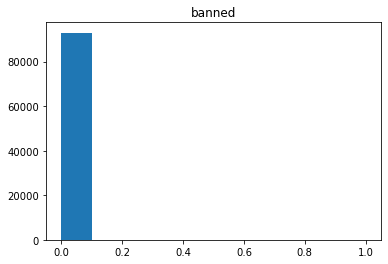

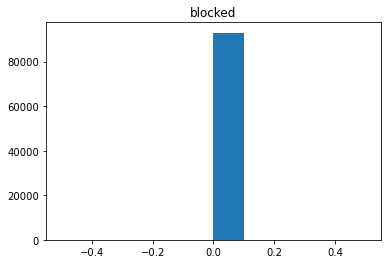

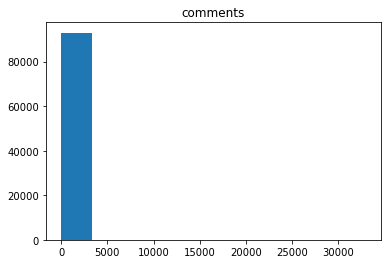

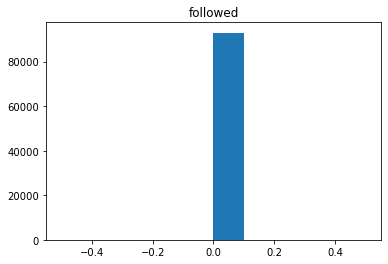

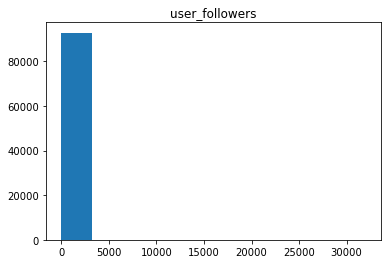

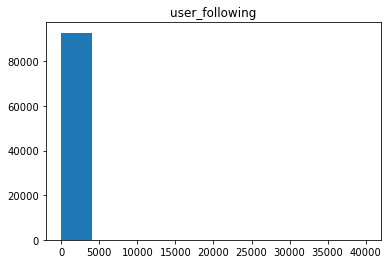

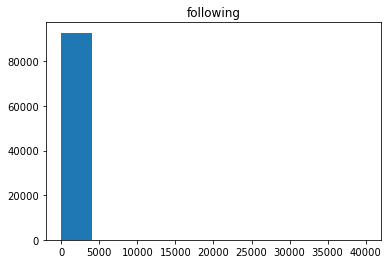

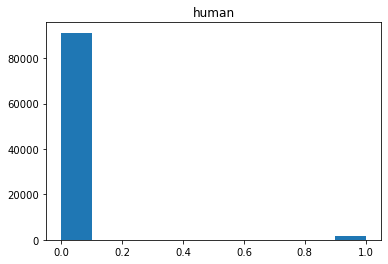

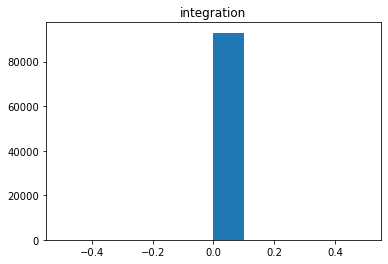

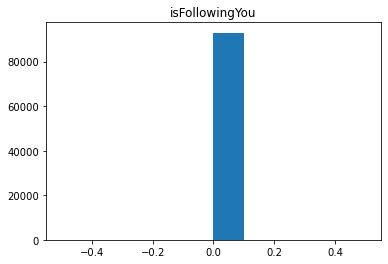

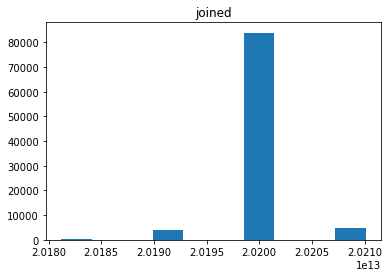

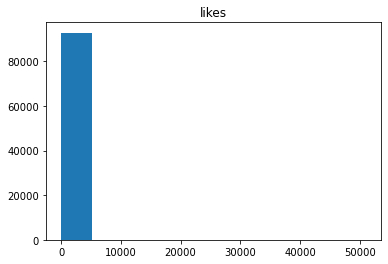

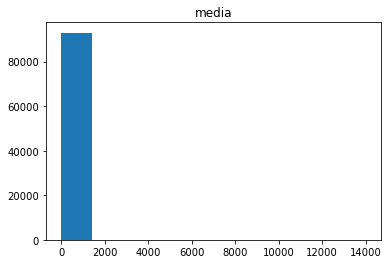

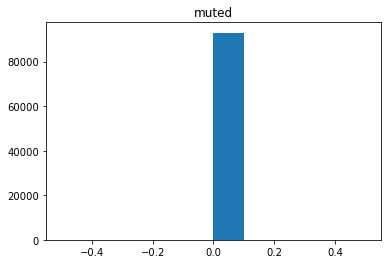

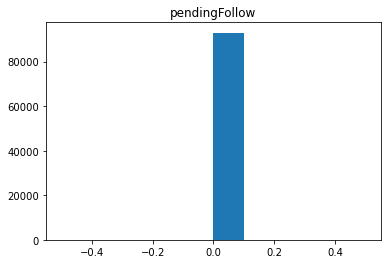

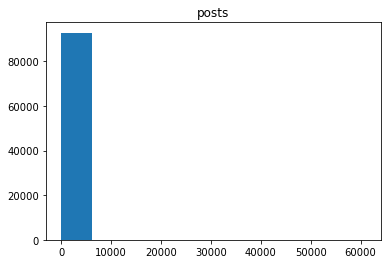

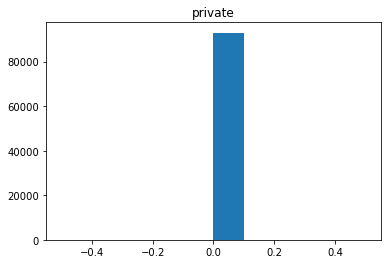

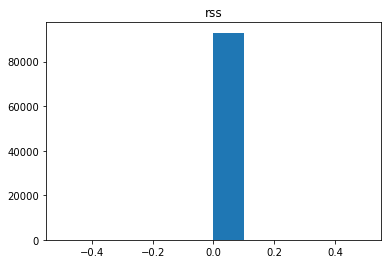

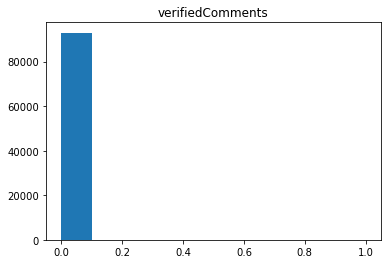

In [23]:
for i in numeric_cols: 
    plt.hist(sample[i])
    plt.title(i)
    plt.show()
    print()